In [1]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from natsort import natsorted
import pandas as pd


import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import sys
sys.path.insert(0,'../../../purity-monitor/')
sys.path.insert(0,'../../WaveformAnalysis')

In [3]:
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import Waveform as Waveform
import SiPM as SiPM

In [4]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
importlib.reload(SiPM)

<module 'SiPM' from '../../../purity-monitor/SiPM.py'>

In [5]:
D1 = SiPM.SiPM(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/', 
                    Selection='*DCR*.h5')
D1.Ch = [Waveform.Waveform(ID=x, Pol=1) for x in range(1,3)]

print(len(D1.Files))
for i,File in enumerate(natsorted(D1.Files)):
    print(i, File)
    print('Getting data...')
    D1.ImportDataFromHDF5(File, D1.Ch)

#     print('Getting sampling information...')
    D1.get_sampling()

#     print('Getting filtered waveforms...')
    D1.Ch[0].Amp = D1.run_filter(D1.Ch[0].Amp)

#     print('Getting deconvolved waveforms...')
    D1.Ch[0].Deconv = D1.run_deconvolution(D1.Ch[0].Amp)

#     print('Getting peak amplitudes and positions...')
    D1.get_peaks(D1.Ch[0].Deconv)

#     print('Clearing variables...')
    D1.clear()

226
0 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_0.h5
Getting data...
Getting deconvolution filter...
1 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_1.h5
Getting data...
2 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_2.h5
Getting data...
3 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_3.h5
Getting data...
4 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_4.h5
Getting data...
5 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_5.h5
Getting data...
6 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_6.h5
Getting data...
7 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_7.h5
Getting data...
8 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_32V_8.h5
Getting data...
9 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/2

76 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_53.h5
Getting data...
77 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_54.h5
Getting data...
78 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_55.h5
Getting data...
79 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_56.h5
Getting data...
80 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_57.h5
Getting data...
81 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_58.h5
Getting data...
82 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_59.h5
Getting data...
83 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_60.h5
Getting data...
84 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_61.h5
Getting data...
85 /projec

150 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_127.h5
Getting data...
151 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_128.h5
Getting data...
152 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_129.h5
Getting data...
153 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_130.h5
Getting data...
154 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_131.h5
Getting data...
155 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_132.h5
Getting data...
156 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_133.h5
Getting data...
157 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_134.h5
Getting data...
158 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_135.h5
Getting 

224 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_201.h5
Getting data...
225 /project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211123/GXe_SiPM_DCR_33V_rename_202.h5
Getting data...


50.88094462676682
44.88094462676682 57.88094462676682
95.76188925353364 105.26188925353364
146.64283388030046 154.9761672136338
197.52377850706728 205.27377850706728
248.4047231338341 255.8047231338341
299.2856677606009 306.4523344272676


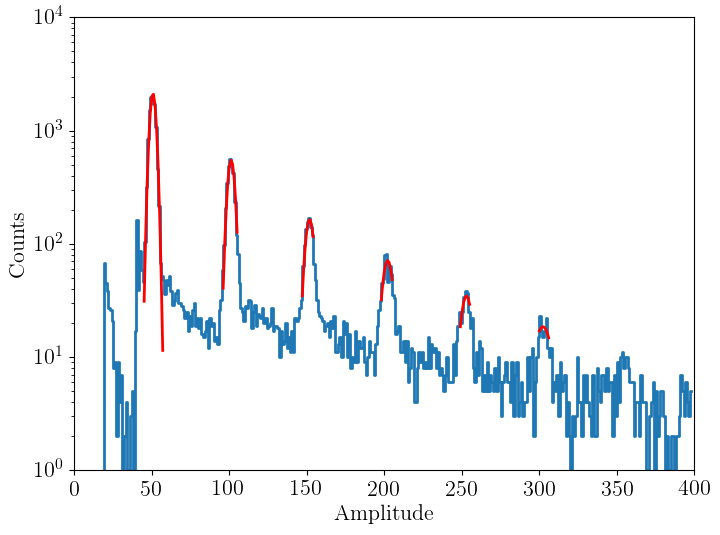

mean_gain 50.383129563686246
sd_gain= 0.47977567383052194


In [6]:
def gauss_func(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

h,hx = np.histogram(D1.peak_height, bins=np.arange(0,400,1))

pe = np.median(D1.peak_height)
print (pe)
pe_fit = []

plt.figure()
for i in range(1,7):
    cut = np.where((hx[:-1]>pe*i-(6)) & (hx[:-1]<pe*i+(7/i)))
    print(pe*i-(6),pe*i+(7/i))
    
    popt,pcov = curve_fit(gauss_func, hx[:-1][cut], h[cut], 
                          p0=[np.max(h[cut]), pe*i,10],maxfev=100000)
    pe_fit.append(popt)
    plt.plot(hx[:-1][cut], gauss_func(hx[:-1][cut], *popt), color='r', zorder=10)

pe_fit = np.array(pe_fit)    
# plt.hist(D1.peak_height, bi7s=np.arange(0,400,1))
plt.xlabel('Amplitude')
plt.ylabel('Counts')
plt.yscale('log')
plt.step(hx[:-1], h, lw=2)
plt.savefig('deconvolution_hist_pe_11-23-21.pdf')
plt.show()
gain = np.diff(pe_fit[:,1])
# print ('gain_diff=',gain)
gain = np.insert(gain,0,pe_fit[0,1])
print('mean_gain',np.mean(gain))
print('sd_gain=',np.std(gain))

In [ ]:
gain = np.diff(pe_fit[:,1])
gain = np.insert(gain,0,pe_fit[0,1])
D1.peak_height_calib = np.array(D1.peak_height)/np.mean(gain)
ca = (np.mean(D1.peak_height_calib[(D1.peak_height_calib<7) & (D1.peak_height_calib>0)]) - 1)*100

h,hx = np.histogram(D1.peak_height_calib, bins=np.arange(0,10,0.05))

plt.figure()
plt.grid()
plt.xticks(np.arange(0,10,1))
plt.xlabel('Number of p.e.')
plt.ylabel('Counts')
plt.yscale('log')
plt.step(hx[:-1], h, lw=2, where='post', label='$\Lambda={:.2f}$\% at 33V'.format(ca))
plt.legend(loc='upper right')
plt.savefig('deconvolution_hist_pe_calib_11-23-21.pdf')
plt.show()

In [ ]:
res = np.abs(pe_fit[:,2])/pe_fit[:,1]
fit_err = np.sqrt(np.diag(pcov))
res_err = np.sqrt(pe_fit[:,2]**2/pe_fit[:,1]**4 * fit_err[1]**2 + 1.0/pe_fit[:,1]**2 * fit_err[2]**2)

plt.figure()
plt.xticks(np.arange(0,len(res)+2,1))
plt.xlim(0,len(res)+1)
# plt.ylim(0,0.2)
plt.xlabel('Number of p.e.')
plt.ylabel('Peak Resolution [$\sigma/\mu$]')
plt.errorbar(np.arange(1,len(res)+1,1), res, yerr=res_err, marker='o', ms=5, label='Data')
plt.hlines(y=0.1, xmin=0, xmax=len(res)+1, ls=':', label='Specification')
plt.legend(loc='upper right')
plt.savefig('pe_resolution_11-23-21.pdf')
plt.show()

In [ ]:
plt.figure()
plt.xlim(0,100)
plt.ylim(0,15)
plt.xlabel('Time since start [hours]')
plt.ylabel('Event Rate [Hz]')
dark_count_rate_23=[]
time_23=[]
num = 100
for j in range(int(len(D1.peak_num)/num)):
    plt.scatter(j*7./60., np.sum(D1.peak_num[j*num:(j+1)*num])/(0.1*num), color='k', s=5)
    dark_count_rate_23.append(np.sum(D1.peak_num[j*num:(j+1)*num])/(0.1*num))
    time_23.append(j*7./60.)
plt.savefig('dark_count_rate_vs_time_11-23-21.pdf')
plt.show()
# %store dark_count_rate_23
# %store time_23